# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pickle
from sklearn.preprocessing import LabelEncoder
import time

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Importing Dataset

In [3]:
dataset = pd.read_csv("Dataset/kidney_disease.csv")

# EDA

In [4]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
dataset.shape

(400, 26)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
dataset.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [8]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [9]:
dataset.drop('id', axis = 1, inplace = True)

In [10]:
dataset.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [11]:
dataset.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [12]:
dataset['packed_cell_volume'] = pd.to_numeric(dataset['packed_cell_volume'], errors='coerce')
dataset['white_blood_cell_count'] = pd.to_numeric(dataset['white_blood_cell_count'], errors='coerce')
dataset['red_blood_cell_count'] = pd.to_numeric(dataset['red_blood_cell_count'], errors='coerce')

In [13]:
dataset

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [14]:
dataset['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

dataset['coronary_artery_disease'] = dataset['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

dataset['class'] = dataset['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [15]:
dataset['class'] = dataset['class'].map({'ckd': 0, 'not ckd': 1})
dataset['class'] = pd.to_numeric(dataset['class'], errors='coerce')

In [16]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {dataset[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



In [17]:
cat_cols = [col for col in dataset.columns if dataset[col].dtype == 'object']
num_cols = [col for col in dataset.columns if dataset[col].dtype != 'object']

In [18]:
for col in cat_cols:
    print(f"{col} has {dataset[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values



# Data visualization

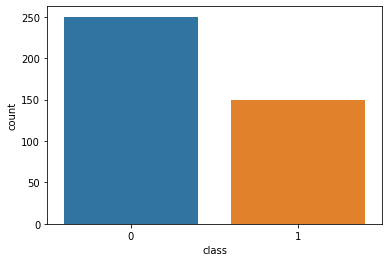

In [19]:
sns.countplot(x = 'class',data = dataset)

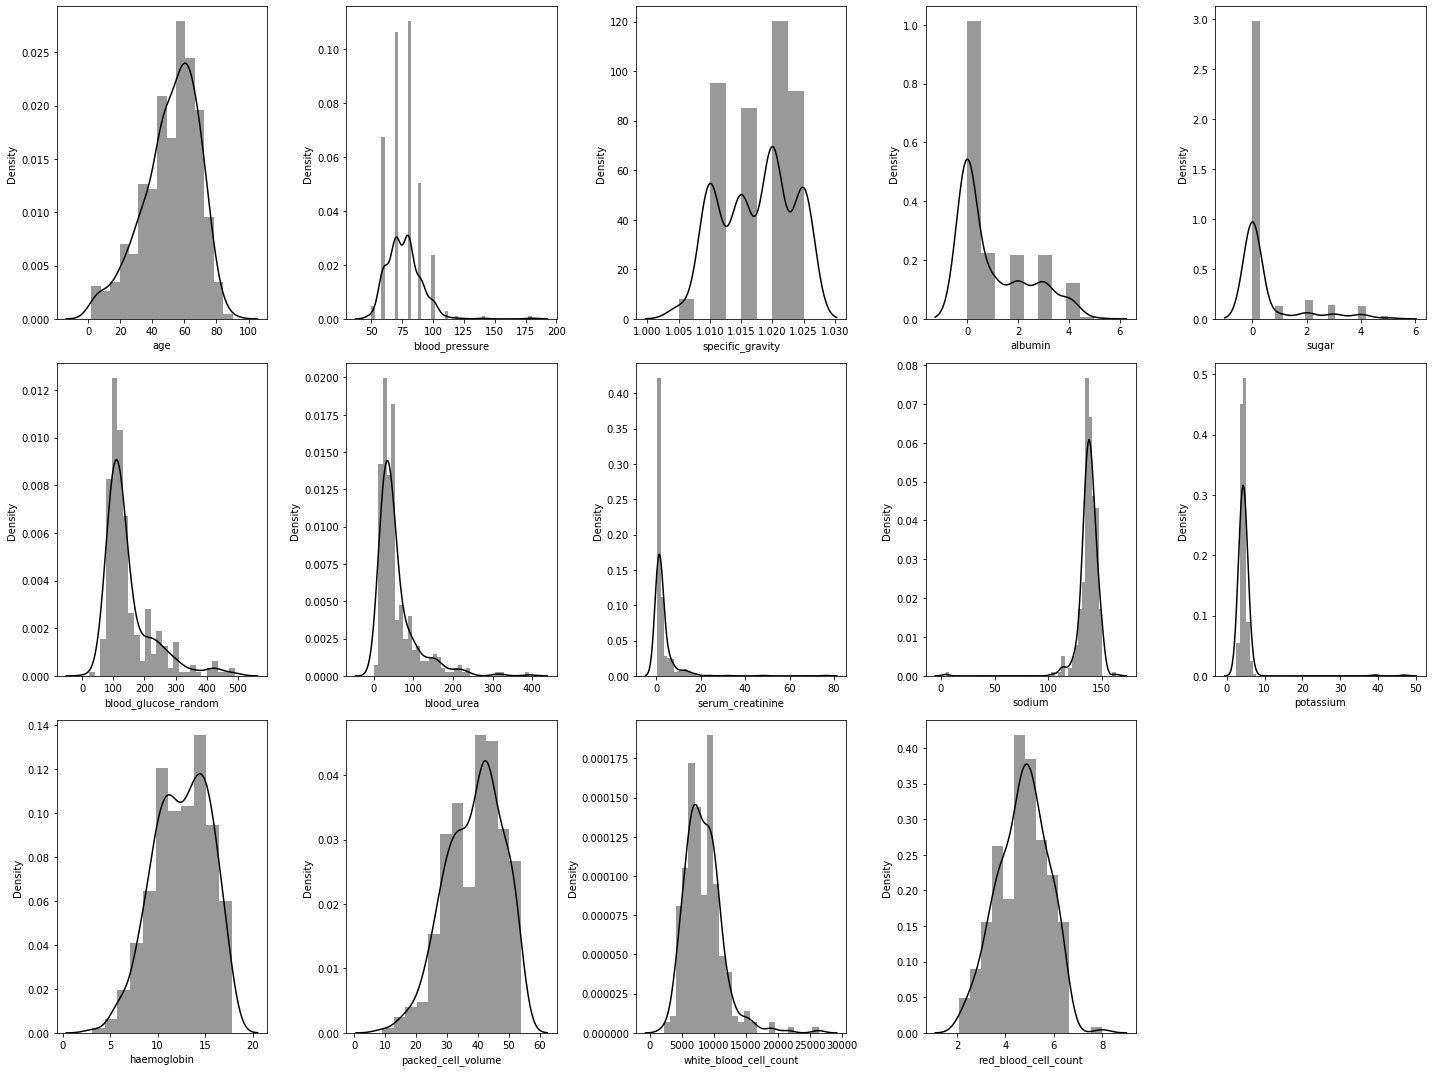

In [20]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(dataset[column],color='black',)
        plt.xlabel(column)
    
        
    plotnumber += 1

plt.tight_layout()
plt.show()

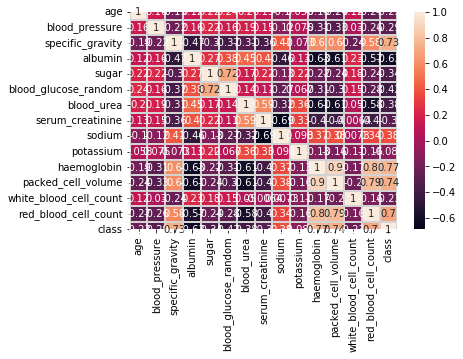

In [21]:
cor=dataset.corr()
sns.heatmap(cor, annot = True, linewidths = 1, linecolor = 'lightgrey')

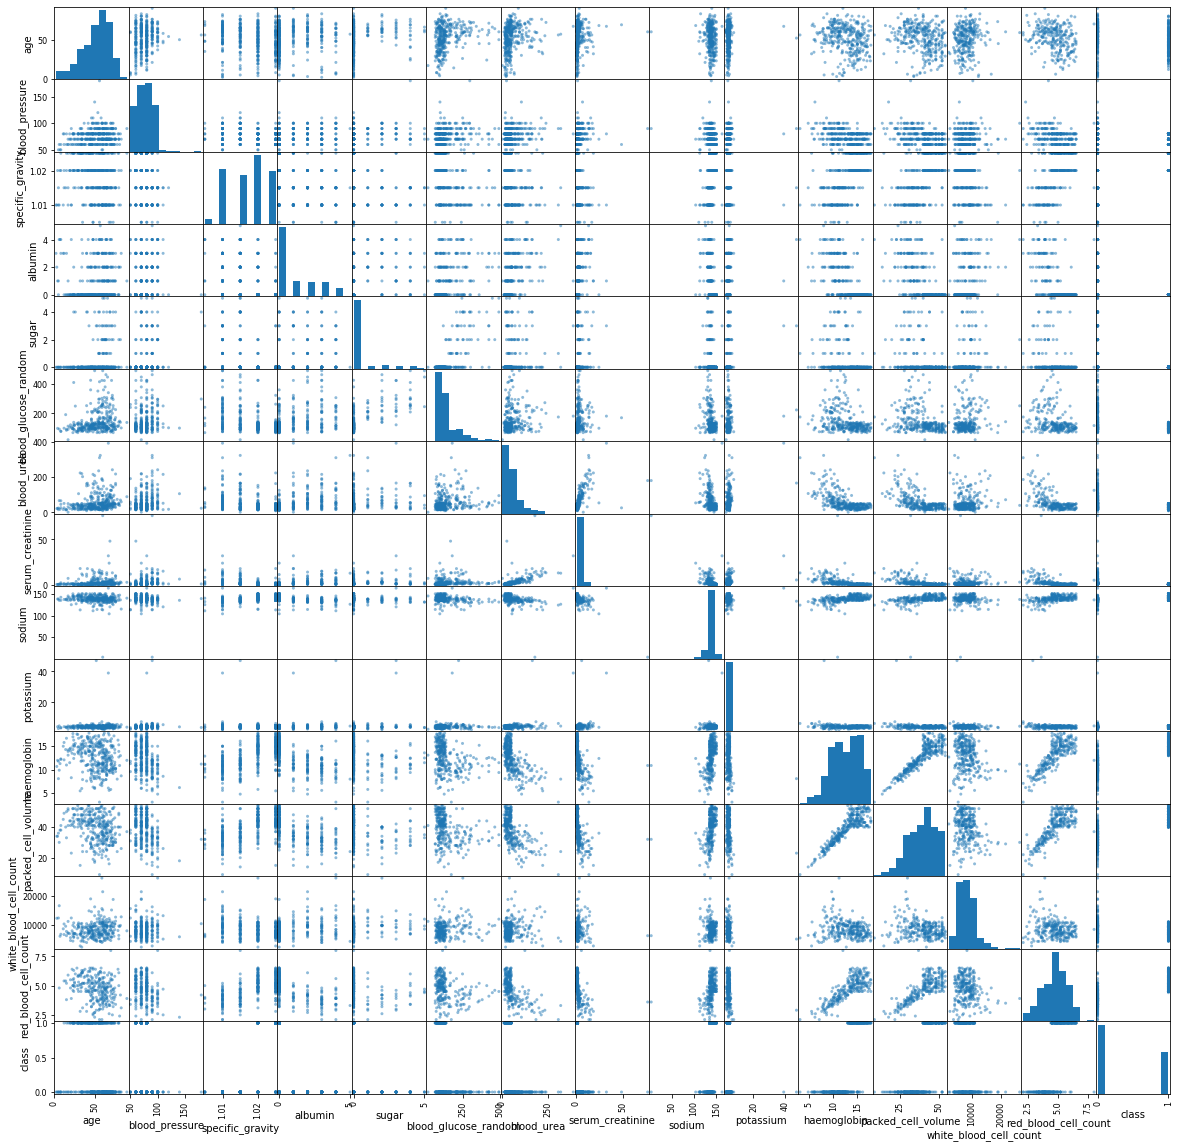

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (20, 20));

# Model Building 

In [23]:
dataset.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [24]:
dataset[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
class                       0
dtype: int64

In [25]:
def random_value_imputation(feature):
    random_sample = dataset[feature].dropna().sample(dataset[feature].isna().sum())
    random_sample.index = dataset[dataset[feature].isnull()].index
    dataset.loc[dataset[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = dataset[feature].mode()[0]
    dataset[feature] = dataset[feature].fillna(mode)

In [26]:
for col in num_cols:
    random_value_imputation(col)
dataset[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
class                     0
dtype: int64

In [27]:
for col in cat_cols:
    print(f"{col} has {dataset[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories



In [28]:
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

In [29]:
for col in cat_cols:
    impute_mode(col)
dataset[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
dtype: int64

In [30]:
le = LabelEncoder()

for col in cat_cols:
    dataset[col] = le.fit_transform(dataset[col])

In [31]:
dataset.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,125.0,...,38.0,6000.0,6.0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.0,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [32]:
dataset.to_csv('filtered.csv')

# Splitting the dataset

In [33]:
X = dataset.drop(['class'] , axis= 1)

In [34]:
y = dataset['class']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
start_time = time.time()
LR.fit(X_train, y_train)
end_time = time.time()
lr_time = end_time - start_time

In [38]:
evaluate(LR, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[178  20]
 [ 13 109]]
ACCURACY SCORE:
0.8969
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.931937    0.844961  0.896875    0.888449      0.898778
recall       0.898990    0.893443  0.896875    0.896216      0.896875
f1-score     0.915167    0.868526  0.896875    0.891846      0.897385
support    198.000000  122.000000  0.896875  320.000000    320.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[46  6]
 [ 2 26]]
ACCURACY SCORE:
0.9000
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.958333   0.812500       0.9   0.885417      0.907292
recall      0.884615   0.928571       0.9   0.906593      0.900000
f1-score    0.920000   0.866667       0.9   0.893333      0.901333
support    52.000000  28.000000       0.9  80.000000     80.000000


In [39]:
y_pred = LR.predict(X_test)
a = accuracy_score(y_test, y_pred) * 100
p = precision_score(y_test,y_pred,average='macro') * 100 
r = recall_score(y_test,y_pred,average='macro') * 100
f = f1_score(y_test,y_pred,average='macro') * 100

# Decision Tree

In [40]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
start_time = time.time()  
dt.fit(X_train, y_train)
end_time = time.time()  

dt_time = end_time - start_time

In [41]:
evaluate(dt, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[198   0]
 [  0 122]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    198.0  122.0       1.0      320.0         320.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[52  0]
 [ 1 27]]
ACCURACY SCORE:
0.9875
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.981132   1.000000    0.9875   0.990566      0.987736
recall      1.000000   0.964286    0.9875   0.982143      0.987500
f1-score    0.990476   0.981818    0.9875   0.986147      0.987446
support    52.000000  28.000000    0.9875  80.000000     80.000000


In [42]:
y_pred = dt.predict(X_test)
a1 = accuracy_score(y_test, y_pred) * 100
p1 = precision_score(y_test,y_pred,average='macro') * 100 
r1 = recall_score(y_test,y_pred,average='macro') * 100
f1 = f1_score(y_test,y_pred,average='macro') * 100

# SVM

In [43]:
from sklearn.svm import SVC
SVM = SVC()
start_time = time.time() 
SVM.fit(X_train, y_train)
end_time = time.time() 

svm_time = end_time - start_time

In [44]:
evaluate(SVM, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[198   0]
 [122   0]]
ACCURACY SCORE:
0.6188
CLASSIFICATION REPORT:
                    0      1  accuracy   macro avg  weighted avg
precision    0.618750    0.0   0.61875    0.309375      0.382852
recall       1.000000    0.0   0.61875    0.500000      0.618750
f1-score     0.764479    0.0   0.61875    0.382239      0.473021
support    198.000000  122.0   0.61875  320.000000    320.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[52  0]
 [28  0]]
ACCURACY SCORE:
0.6500
CLASSIFICATION REPORT:
                   0     1  accuracy  macro avg  weighted avg
precision   0.650000   0.0      0.65   0.325000      0.422500
recall      1.000000   0.0      0.65   0.500000      0.650000
f1-score    0.787879   0.0      0.65   0.393939      0.512121
support    52.000000  28.0      0.65  80.000000     80.000000


In [45]:
y_pred = dt.predict(X_test)
a2 = accuracy_score(y_test, y_pred) * 100
p2 = precision_score(y_test,y_pred,average='macro') * 100 
r2 = recall_score(y_test,y_pred,average='macro') * 100
f2 = f1_score(y_test,y_pred,average='macro') * 100


# Bagged Decision Trees (Bagging) Classifer

In [46]:
from sklearn.ensemble import BaggingClassifier
base_classifier = tree.DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(base_classifier)
start_time = time.time() 
bagging_classifier.fit(X_train, y_train)
end_time = time.time() 

bg_time = end_time - start_time

In [47]:
evaluate(bagging_classifier, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[198   0]
 [  1 121]]
ACCURACY SCORE:
0.9969
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.994975    1.000000  0.996875    0.997487      0.996891
recall       1.000000    0.991803  0.996875    0.995902      0.996875
f1-score     0.997481    0.995885  0.996875    0.996683      0.996873
support    198.000000  122.000000  0.996875  320.000000    320.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[52  0]
 [ 1 27]]
ACCURACY SCORE:
0.9875
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.981132   1.000000    0.9875   0.990566      0.987736
recall      1.000000   0.964286    0.9875   0.982143      0.987500
f1-score    0.990476   0.981818    0.9875   0.986147      0.987446
support    52.000000  28.000000    0.9875  80.000000     80.000000


In [48]:
y_pred = bagging_classifier.predict(X_test)
a3 = accuracy_score(y_test, y_pred) * 100
p3 = precision_score(y_test,y_pred,average='macro') * 100 
r3 = recall_score(y_test,y_pred,average='macro') * 100
f3 = f1_score(y_test,y_pred,average='macro') * 100

# Adaboost

In [49]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
start_time = time.time()
ada.fit(X_train, y_train)
end_time = time.time() 

ada_time = end_time - start_time

In [50]:
evaluate(ada, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[198   0]
 [  0 122]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    198.0  122.0       1.0      320.0         320.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[52  0]
 [ 1 27]]
ACCURACY SCORE:
0.9875
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.981132   1.000000    0.9875   0.990566      0.987736
recall      1.000000   0.964286    0.9875   0.982143      0.987500
f1-score    0.990476   0.981818    0.9875   0.986147      0.987446
support    52.000000  28.000000    0.9875  80.000000     80.000000


In [51]:
y_pred = ada.predict(X_test)
a4 = accuracy_score(y_test, y_pred) * 100
p4 = precision_score(y_test,y_pred,average='macro') * 100 
r4 = recall_score(y_test,y_pred,average='macro') * 100
f4 = f1_score(y_test,y_pred,average='macro') * 100

# Voting Classifier

In [52]:
from sklearn.ensemble import VotingClassifier

clf1 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf2 = BaggingClassifier(base_classifier)
clf3 = tree.DecisionTreeClassifier()

eclf1 = VotingClassifier(estimators=[('ada', clf1), ('bg', clf2), ('dt', clf3)], voting='hard')

start_time = time.time()

eclf1.fit(X_train, y_train)
end_time = time.time() 

vt_time = end_time - start_time

In [53]:
evaluate(eclf1, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[198   0]
 [  0 122]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    198.0  122.0       1.0      320.0         320.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[52  0]
 [ 1 27]]
ACCURACY SCORE:
0.9875
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.981132   1.000000    0.9875   0.990566      0.987736
recall      1.000000   0.964286    0.9875   0.982143      0.987500
f1-score    0.990476   0.981818    0.9875   0.986147      0.987446
support    52.000000  28.000000    0.9875  80.000000     80.000000


In [54]:
y_pred = eclf1.predict(X_test)
a5 = accuracy_score(y_test, y_pred) * 100
p5 = precision_score(y_test,y_pred,average='macro') * 100 
r5 = recall_score(y_test,y_pred,average='macro') * 100
f5 = f1_score(y_test,y_pred,average='macro') * 100

# KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time() 

knn_time = end_time - start_time

In [56]:
evaluate(knn, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[168  30]
 [ 17 105]]
ACCURACY SCORE:
0.8531
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.908108    0.777778  0.853125    0.842943      0.858420
recall       0.848485    0.860656  0.853125    0.854570      0.853125
f1-score     0.877285    0.817121  0.853125    0.847203      0.854347
support    198.000000  122.000000  0.853125  320.000000    320.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[35 17]
 [ 5 23]]
ACCURACY SCORE:
0.7250
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.875000   0.575000     0.725   0.725000       0.77000
recall      0.673077   0.821429     0.725   0.747253       0.72500
f1-score    0.760870   0.676471     0.725   0.718670       0.73133
support    52.000000  28.000000     0.725  80.000000      80.00000


In [57]:
y_pred = knn.predict(X_test)
a6 = accuracy_score(y_test, y_pred) * 100
p6 = precision_score(y_test,y_pred,average='macro') * 100 
r6 = recall_score(y_test,y_pred,average='macro') * 100
f6 = f1_score(y_test,y_pred,average='macro') * 100

# Xgboost

In [58]:
import xgboost as xgb
xg = xgb.XGBClassifier()
start_time = time.time()
xg.fit(X_train, y_train)
end_time = time.time() 

xg_time = end_time - start_time

In [59]:
evaluate(xg, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[198   0]
 [  0 122]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    198.0  122.0       1.0      320.0         320.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[52  0]
 [ 1 27]]
ACCURACY SCORE:
0.9875
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.981132   1.000000    0.9875   0.990566      0.987736
recall      1.000000   0.964286    0.9875   0.982143      0.987500
f1-score    0.990476   0.981818    0.9875   0.986147      0.987446
support    52.000000  28.000000    0.9875  80.000000     80.000000


In [60]:
y_pred = knn.predict(X_test)
a7 = accuracy_score(y_test, y_pred) * 100
p7 = precision_score(y_test,y_pred,average='macro') * 100 
r7 = recall_score(y_test,y_pred,average='macro') * 100
f7 = f1_score(y_test,y_pred,average='macro') * 100

# Gradient Boosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
start_time = time.time()
gb.fit(X_train, y_train)
end_time = time.time() 

gb_time = end_time - start_time

In [62]:
evaluate(gb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[198   0]
 [  0 122]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    198.0  122.0       1.0      320.0         320.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[51  1]
 [ 0 28]]
ACCURACY SCORE:
0.9875
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   1.000000   0.965517    0.9875   0.982759      0.987931
recall      0.980769   1.000000    0.9875   0.990385      0.987500
f1-score    0.990291   0.982456    0.9875   0.986374      0.987549
support    52.000000  28.000000    0.9875  80.000000     80.000000


In [63]:
y_pred = knn.predict(X_test)
a8 = accuracy_score(y_test, y_pred) * 100
p8 = precision_score(y_test,y_pred,average='macro') * 100 
r8 = recall_score(y_test,y_pred,average='macro') * 100
f8 = f1_score(y_test,y_pred,average='macro') * 100

## Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time() 

rf_time = end_time - start_time

In [65]:
evaluate(rf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[198   0]
 [  0 122]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    198.0  122.0       1.0      320.0         320.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[52  0]
 [ 1 27]]
ACCURACY SCORE:
0.9875
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.981132   1.000000    0.9875   0.990566      0.987736
recall      1.000000   0.964286    0.9875   0.982143      0.987500
f1-score    0.990476   0.981818    0.9875   0.986147      0.987446
support    52.000000  28.000000    0.9875  80.000000     80.000000


In [66]:
y_pred = rf.predict(X_test)
a9 = accuracy_score(y_test, y_pred) * 100
p9 = precision_score(y_test,y_pred,average='macro') * 100 
r9 = recall_score(y_test,y_pred,average='macro') * 100
f9 = f1_score(y_test,y_pred,average='macro') * 100

# Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
start_time = time.time()
nb.fit(X_train, y_train)
end_time = time.time() 

nb_time = end_time - start_time

In [68]:
evaluate(nb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[187  11]
 [  3 119]]
ACCURACY SCORE:
0.9563
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.984211    0.915385   0.95625    0.949798      0.957971
recall       0.944444    0.975410   0.95625    0.959927      0.956250
f1-score     0.963918    0.944444   0.95625    0.954181      0.956493
support    198.000000  122.000000   0.95625  320.000000    320.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[51  1]
 [ 3 25]]
ACCURACY SCORE:
0.9500
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.944444   0.961538      0.95   0.952991      0.950427
recall      0.980769   0.892857      0.95   0.936813      0.950000
f1-score    0.962264   0.925926      0.95   0.944095      0.949546
support    52.000000  28.000000      0.95  80.000000     80.000000


In [69]:
y_pred = nb.predict(X_test)
a10 = accuracy_score(y_test, y_pred) * 100
p10 = precision_score(y_test,y_pred,average='macro') * 100 
r10 = recall_score(y_test,y_pred,average='macro') * 100
f10 = f1_score(y_test,y_pred,average='macro') * 100

# Comparison

In [70]:
results ={'Accuracy': [a,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10],
 'Recall':[r,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10],
 'Precision': [p,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10],
  'F1 Score' : [f,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10]}
index = ['Logistic Regression','Decision Tree','SVM','Bagging Classifier','Adaboost','Voting Classifier','KNN','Xgboost','Gradient Boosting','Random Forest','Naive Bayes']

In [71]:
results =pd.DataFrame(results,index=index)

In [72]:
print(results)

                     Accuracy     Recall  Precision   F1 Score
Logistic Regression     90.00  90.659341  88.541667  89.333333
Decision Tree           98.75  98.214286  99.056604  98.614719
SVM                     98.75  98.214286  99.056604  98.614719
Bagging Classifier      98.75  98.214286  99.056604  98.614719
Adaboost                98.75  98.214286  99.056604  98.614719
Voting Classifier       98.75  98.214286  99.056604  98.614719
KNN                     72.50  74.725275  72.500000  71.867008
Xgboost                 72.50  74.725275  72.500000  71.867008
Gradient Boosting       72.50  74.725275  72.500000  71.867008
Random Forest           98.75  98.214286  99.056604  98.614719
Naive Bayes             95.00  93.681319  95.299145  94.409504


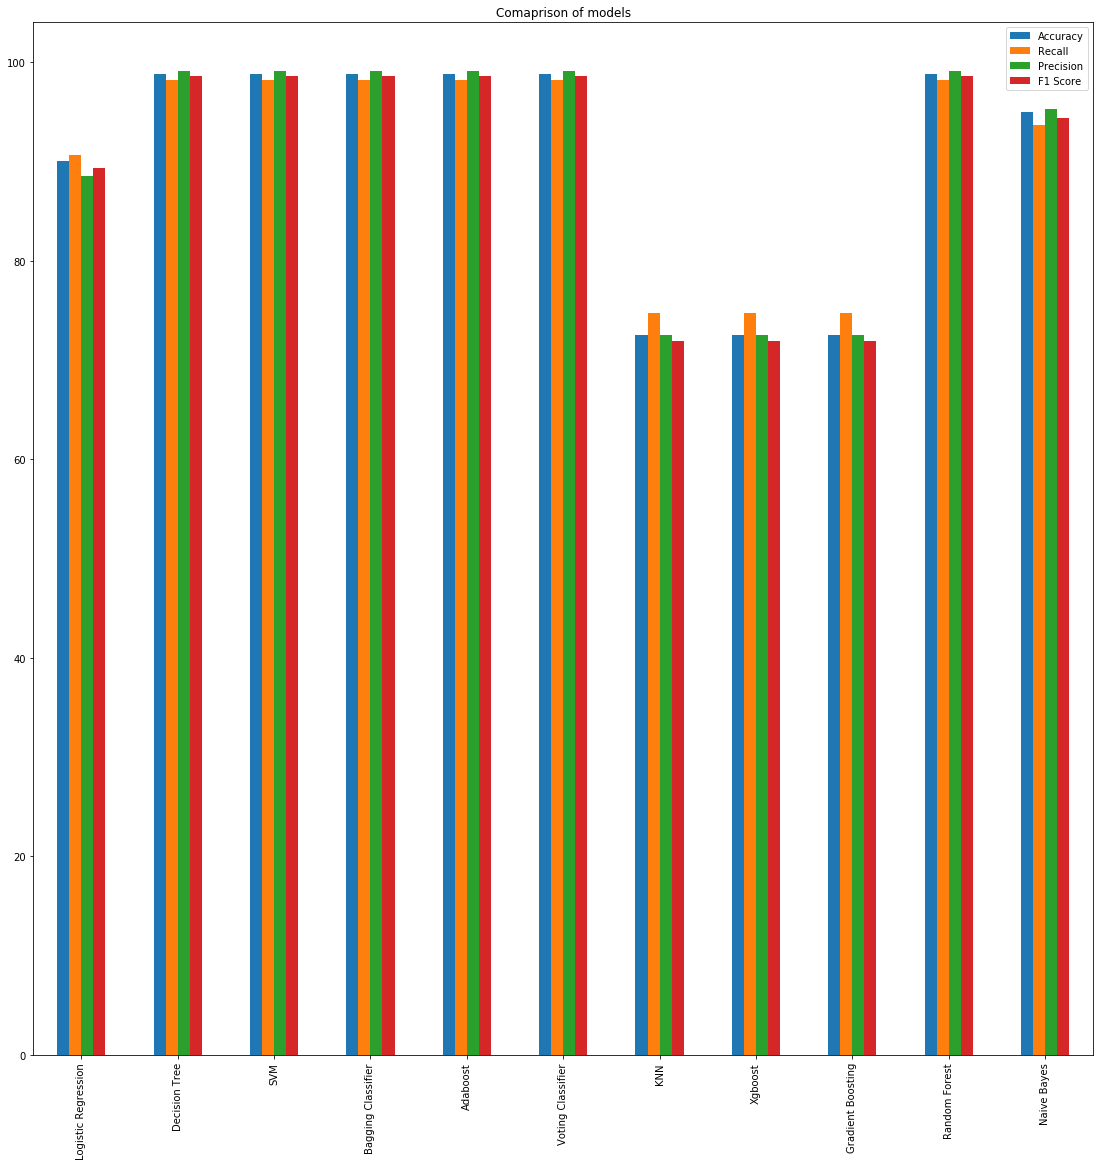

In [73]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(19,19)).get_figure()
fig.savefig('Final Result.png')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD02200088>,
      dtype=object)

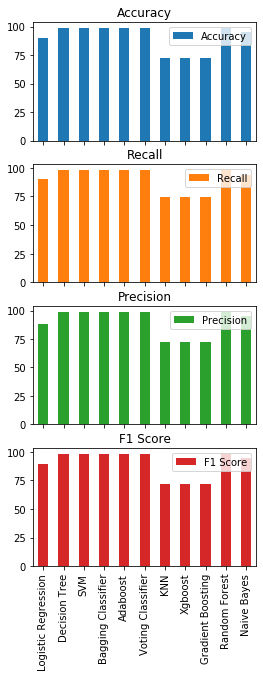

In [74]:
results.plot(subplots=True,kind ='bar',figsize=(4,10))

# Execution Time

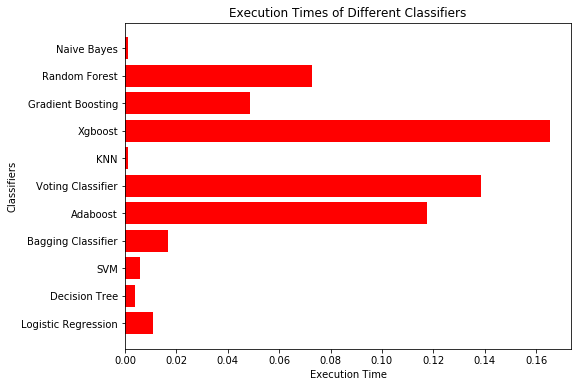

In [75]:
classifiers = ['Logistic Regression','Decision Tree','SVM','Bagging Classifier','Adaboost','Voting Classifier','KNN','Xgboost','Gradient Boosting','Random Forest','Naive Bayes']
execution_times = [lr_time, dt_time, svm_time, bg_time, ada_time, vt_time,knn_time,xg_time,gb_time,rf_time,nb_time]
plt.figure(figsize=(8, 6))
plt.barh(classifiers, execution_times, color='red')
plt.xlabel('Execution Time')
plt.ylabel('Classifiers')
plt.title('Execution Times of Different Classifiers')
plt.show()

# Saving the model

In [76]:
pickle.dump(rf, open('model.pkl', 'wb'))